In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/'
# path = "/content/drive/My Drive/RSM 8521 (AI and Deep Learning)/TEAM 17/"
df_train= pd.read_csv(path+'train.csv')
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 4.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [5]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [6]:
df_train.isna().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [7]:
df_train.dropna(subset=['question1','question2'],inplace=True)
df_train.isna().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [8]:
def create_embeddings(inputs):
    print("encoding with model")
    sentence_embeddings = model.encode(inputs, show_progress_bar=True)
    return sentence_embeddings

In [9]:
from tqdm import tqdm
tqdm.pandas()

In [10]:
embeddings_first_question = create_embeddings(list(df_train["question1"].values))

encoding with model


Batches:   0%|          | 0/12634 [00:00<?, ?it/s]

In [11]:
embeddings_second_question = create_embeddings(list(df_train["question2"].values))

encoding with model


Batches:   0%|          | 0/12634 [00:00<?, ?it/s]

In [12]:
from scipy import spatial

def calc_similarity(embeddings1, embeddings2):
    cosine_distance = spatial.distance.cosine(embeddings1, embeddings2)
    cosine_similarity = 1 - cosine_distance
    return cosine_similarity

In [13]:
similarities = []
for row in tqdm(zip(embeddings_first_question, embeddings_second_question), total=len(embeddings_first_question)):
    similarities.append(calc_similarity(row[0], row[1]))

100%|██████████| 404287/404287 [00:17<00:00, 23212.02it/s]


In [14]:
df_train_copy=df_train.copy()
df_train_copy["similarity"] = similarities
df_train_copy['absolute_similarity']=np.abs(similarities)
df_train_copy.head()

,id,qid1,qid2,question1,question2,is_duplicate,similarity,absolute_similarity
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,0.912277,0.912277
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,0.655141,0.655141
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,0.515560,0.515560
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,0.104022,0.104022
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,0.325348,0.325348


In [15]:
df_train_copy["prediction"] = df_train_copy["similarity"] > 0.8
df_train_copy["prediction"] = df_train_copy["prediction"].astype(int)
sum(df_train_copy["is_duplicate"] == df_train_copy["prediction"]) / len(df_train_copy)

0.7808635944267315

In [17]:
def calculate_accuracy(df, threshold):
    df["prediction"] = df["similarity"] > threshold
    df["prediction"] = df["prediction"].astype(int)
    correct = sum(df_train_copy["is_duplicate"] == df_train_copy["prediction"])
    total = df.shape[0]
    accuracy = correct / total
    return correct, accuracy

In [19]:
thresholds = []
accuracies = []
corrects = []

for threshold in range(1, 100, 1):
    threshold = threshold / 100.0
    correct, accuracy = calculate_accuracy(df_train_copy, threshold)
    thresholds.append(threshold)
    accuracies.append(accuracy)
    corrects.append(correct)

In [20]:
df_accuracy = pd.DataFrame()
df_accuracy["threshold"] = thresholds
df_accuracy["accuracy"] = accuracies
df_accuracy["correct"] = corrects

<Axes: >

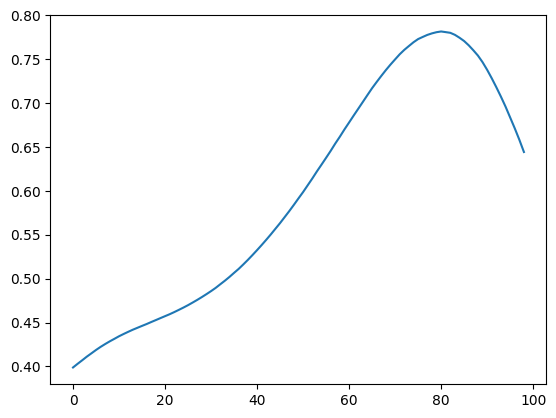

In [21]:
df_accuracy["accuracy"].plot()

# TEST SET

In [22]:
df_test=pd.read_csv(path+'real_test.csv')
df_test

,id,qid1,qid2,question1,question2,is_duplicate
0,1,1,1,Does higher education level mean higher income?,Does higher income level mean higher education...,0.0
1,2,1,1,How many Indians live in the GTA?,Are Indians the largest minority in the GTA?,0.0
2,3,1,1,Will AI replace humans?,Will humans be taken over by AI?,1.0
3,4,1,1,Was U.S. the first country to legalize the gun?,Was the gun first legalized by the United Stat...,1.0
4,5,2,2,Is Pacific Ocean the largest of the world ocea...,Is Pacific Ocean the deepest of the world ocea...,0.0
5,6,2,2,What is the population of India,Is India the contry with the most population o...,0.0
6,7,2,2,Are we going to clear this course?,Is this course going to screw us over?,1.0
7,8,2,2,Will I finish these assignments before deadline?,When can I finish all of these assignements,1.0
8,7,3,3,Is canadian economy going down the drain?,Has Canada been the most impacted country by r...,0.0
9,8,3,3,Does having a masters degree show you're intel...,What is the impact of a master's degree in you...,0.0


In [23]:
df_test.dropna(subset=['question1','question2'],inplace=True)
df_test.isna().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [24]:
embeddings_first_question_test = create_embeddings(list(df_test["question1"]))

encoding with model


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

In [25]:
embeddings_second_question_test = create_embeddings(list(df_test["question2"]))

encoding with model


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

In [26]:
similarities_test = []
for row in tqdm(zip(embeddings_first_question_test, embeddings_second_question_test), total=len(embeddings_first_question_test)):
    similarities_test.append(calc_similarity(row[0], row[1]))

100%|██████████| 44/44 [00:00<00:00, 19422.16it/s]


In [27]:
df_test_copy=df_test.copy()
df_test_copy["similarity"] = similarities_test
df_test_copy['absolute_similarity']=np.abs(similarities_test)
df_test_copy.head()

,id,qid1,qid2,question1,question2,is_duplicate,similarity,absolute_similarity
0,1,1,1,Does higher education level mean higher income?,Does higher income level mean higher education...,0.0,0.977713,0.977713
1,2,1,1,How many Indians live in the GTA?,Are Indians the largest minority in the GTA?,0.0,0.808911,0.808911
2,3,1,1,Will AI replace humans?,Will humans be taken over by AI?,1.0,0.875245,0.875245
3,4,1,1,Was U.S. the first country to legalize the gun?,Was the gun first legalized by the United Stat...,1.0,0.924714,0.924714
4,5,2,2,Is Pacific Ocean the largest of the world ocea...,Is Pacific Ocean the deepest of the world ocea...,0.0,0.815750,0.815750


In [28]:
df_test_copy["prediction"] = df_test_copy["similarity"] > 0.8
df_test_copy["prediction"] = df_test_copy["prediction"].astype(int)
sum(df_test_copy["is_duplicate"] == df_test_copy["prediction"]) / len(df_test_copy)

0.7954545454545454

In [29]:
from sklearn.metrics import classification_report
print(classification_report(df_test_copy['is_duplicate'], df_test_copy['prediction']))

              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85        28
         1.0       0.77      0.62      0.69        16

    accuracy                           0.80        44
   macro avg       0.79      0.76      0.77        44
weighted avg       0.79      0.80      0.79        44

